In [1]:
#Importing the matrix exponentiation function
from scipy.linalg import expm
#Importing constants
import scipy.constants as const
#Numpy
import numpy as np
#Plotting
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Let's define the Pauli Matrices
sigma_x = np.array([[0, 1],[1, 0]])
sigma_y = np.array([[0 , -1j],[1j, 0]])
sigma_z = np.array([[1, 0],[0, -1]])

#Followed by the vector of pauli spin matrices
spin_vector = np.array([sigma_x, sigma_y, sigma_z])

In [3]:
#Let's turn on the magnetic field in one direction and call this the z direction (It's not actually possible to have a magnetic field pointing with just a single component, this is an approximation we're using)
mag_field = np.array([0,0,1])
g_factor  = 2
bohr_magneton = const.physical_constants['Bohr magneton'][0]

#The hamiltonian for a single spin-1/2 particle in a magnetic field is:
hamiltonian = -((g_factor*bohr_magneton)/2)*(mag_field[0]*spin_vector[0] + mag_field[1]*spin_vector[1] + mag_field[2]*spin_vector[2])

In [4]:
eig_values, eig_vectors = np.linalg.eig(hamiltonian)

/home/niall/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/niall/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Energy of Hamiltonian Eigenstates')

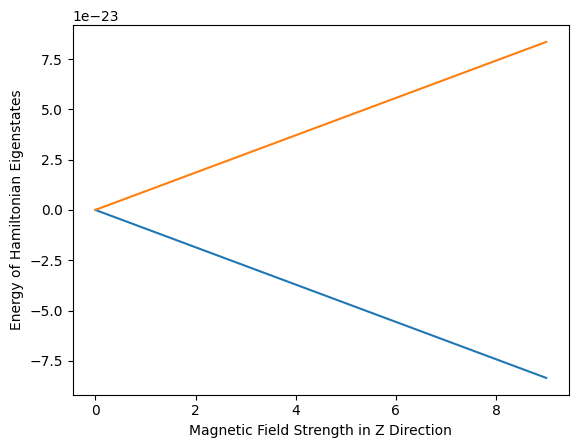

In [5]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)

mag_field_z_values = np.arange(0,10)
eigen_energies_one = []
eigen_energies_two = []

for mag_field_z in mag_field_z_values:
  mag_field   = np.array([0,0,mag_field_z])
  hamiltonian = -((g_factor*bohr_magneton)/2)*(mag_field[0]*spin_vector[0] + mag_field[1]*spin_vector[1] + mag_field[2]*spin_vector[2])
  eig_values, eig_vectors = np.linalg.eig(hamiltonian)
  eigen_energies_one.append(eig_values[0])
  eigen_energies_two.append(eig_values[1])

ax.plot(mag_field_z_values, eigen_energies_one)
ax.plot(mag_field_z_values, eigen_energies_two)

ax.set_xlabel("Magnetic Field Strength in Z Direction")
ax.set_ylabel("Energy of Hamiltonian Eigenstates")

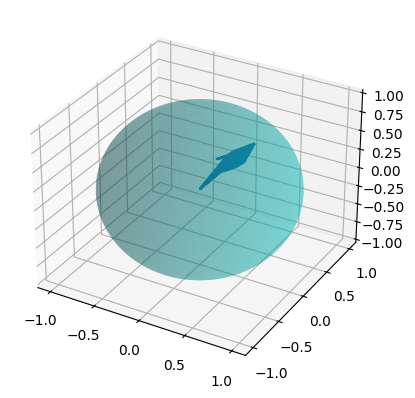

In [6]:
#Larmor Precession
mag_field   = np.array([0,0,0.35])
hamiltonian = -((g_factor*bohr_magneton)/2)*(mag_field[0]*spin_vector[0] + mag_field[1]*spin_vector[1] + mag_field[2]*spin_vector[2])
eig_values, eig_vectors = np.linalg.eig(hamiltonian)

#Let's define the evolution operator, for any time
evolution_operator  = lambda time : expm(-1j*hamiltonian*time/(const.hbar))

#Lin space creates an array starting from 0 to the end value in a number of given steps
time = np.linspace(0,1e-11,50)
initial_state = np.array([[0.95],[np.sqrt(1-0.95**2)]])

# Create a sphere
r = 1
phi, theta = np.mgrid[0.0:np.pi:100j, 0.0:2.0*np.pi:100j]
x = r*np.sin(phi)*np.cos(theta)
y = r*np.sin(phi)*np.sin(theta)
z = r*np.cos(phi)

#Set colours and render
fig_bloch = plt.figure()
ax_bloch = fig_bloch.add_subplot(111, projection='3d')
ax_bloch.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

for current_time in time:
  current_state = np.matmul(evolution_operator(current_time),initial_state)
  theta = 2*np.arccos(np.abs(current_state[0]))
  phi   = np.angle(current_state[1]) - np.angle(current_state[0])
  ax_bloch.quiver(0, 0, 0, np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta))

In [7]:
#Measurement of a spin-up state
spin_up = np.array([[1],[0]])
spin_plus = np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])

#The spin operators for the X, Y, and Z directions are in the spin_vector we defined earlier
spin_op_x = spin_vector[0]
spin_op_y = spin_vector[1]
spin_op_z = spin_vector[2]

#To measure the spin projection along any of the X, Y, and Z axes we find the expectation values
spin_measure_x = np.transpose(np.conj(spin_up)) @ spin_op_x @ spin_up
spin_measure_y = np.transpose(np.conj(spin_up)) @ spin_op_y @ spin_up
spin_measure_z = np.transpose(np.conj(spin_up)) @ spin_op_z @ spin_up

#Expected values of spin operators
print("Expected value of X projection: " + str(spin_measure_x[0][0]))
print("Expected value of Y projection: " + str(spin_measure_y[0][0]))
print("Expected value of Z projection: " + str(spin_measure_z[0][0]))

Expected value of X projection: 0j
Expected value of Y projection: 0j
Expected value of Z projection: (1+0j)


Text(0, 0.5, 'Probability of Up State')

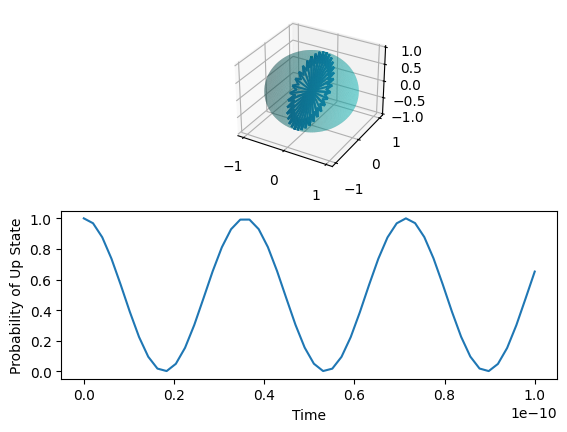

In [8]:
#What happens if we introduce an x component to the magnetic field and evolve our state in time?
#Let's turn on the magnetic field
mag_field = np.array([1,0,0])

#The hamiltonian for a single spin-1/2 particle in a magnetic field is:
hamiltonian = -((g_factor*bohr_magneton)/2)*(mag_field[0]*spin_vector[0] + mag_field[1]*spin_vector[1] + mag_field[2]*spin_vector[2])

#Let's define the evolution operator, for any time
evolution_operator  = lambda time : expm(-1j*hamiltonian*time/const.hbar)

time = np.linspace(0,1e-10,50)
initial_state = np.array([[1],[0]])

up_state = np.array([[1], [0]])
down_state = np.array([[0], [1]])

def prob_up(state):
  return np.abs(np.matmul(np.transpose(np.conjugate(up_state)), state)[0][0])**2

def prob_down(state):
  return np.abs(np.matmul(np.transpose(np.conjugate(down_state)), state)[0][0])**2

# Create a sphere
r = 1
phi, theta = np.mgrid[0.0:np.pi:100j, 0.0:2.0*np.pi:100j]
x = r*np.sin(phi)*np.cos(theta)
y = r*np.sin(phi)*np.sin(theta)
z = r*np.cos(phi)

#Set colours and render
fig_bloch = plt.figure()
ax_bloch = fig_bloch.add_subplot(211, projection='3d')
ax_prob = fig_bloch.add_subplot(212)
ax_bloch.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

prob_up_time = []

for current_time in time:
  current_state = np.matmul(evolution_operator(current_time),initial_state)
  prob_up_time.append(prob_up(current_state))
  theta = 2*np.arccos(np.abs(current_state[0]))
  phi   = np.angle(current_state[1]) - np.angle(current_state[0])
  ax_bloch.quiver(0, 0, 0, np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta))

ax_prob.plot(time, prob_up_time)
ax_prob.set_xlabel("Time")
ax_prob.set_ylabel("Probability of Up State")